In [3]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=f87daabc5db36a549c946ef1830384ca106a96be60f7b342aad1c69c184844d3
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Flight Data Analysis") \
    .getOrCreate()

------------------------------------------------------------------------------------------------------------------------------------------------------
##Read data -session 1
------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
"""
Reading Data in Spark
----------------------------
spark.read.format("__")\
          .option("key", "value")\
          .schema("__")\
          .load("__")

1)spark.read: This is the entry point to Spark's DataFrame API, which you use to read data into a DataFrame.

2)format: Specifies the type of data file you are reading.

            "csv": Comma-Separated Values
            "json": JSON format
            "parquet": Parquet format
            "jdbc": JDBC/ODBC for databases
            "table": Tables in Hive or other sources

3)option: Allows you to set various options for reading the data, such as:

     "header": If set to "true", Spark will treat the first row as the header (column names).
     "inferSchema": If set to "true", Spark will automatically guess the data types of the columns.
     "mode": Determines how Spark handles malformed data.

4)schema: If you want to manually specify the schema (i.e., data types of the columns),
          you can pass it here. This is useful when you know the structure of your data beforehand.

5)load: Specifies the location of your data. This is the path where your data file(s) are stored.

Example-1

spark.read.format("csv")\
          .option("header", "true")\
          .option("inferSchema", "true")\
          .option("mode", "FAILFAST")\
          .load("/path/to/data.csv")

Mode Options
-----------------
When reading data, you can specify how Spark should handle any corrupted or malformed records using the mode option:

    1.FAILFAST: If Spark encounters any malformed data, it will immediately stop the process and throw an error.

    2.DROPMALFORMED: Spark will skip any corrupted records and continue processing the rest of the data.

    3.PERMISSIVE (default): Spark will replace all the corrupted data with null values and continue processing.
"""

In [ ]:
# Read the CSV file
flight_df1 = spark.read.format("csv") \
    .option("header", "false") \
    .option("inferschema", "false") \
    .option("mode", "FAILFAST") \
    .load("/content/2010-summary.csv")

# Show the dataframe
flight_df1.show()

In [ ]:
# Read the CSV file
flight_df1 = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "FAILFAST") \
    .load("/content/2010-summary.csv")

# Show the dataframe
flight_df1.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
##Schema-session 2
------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
"""
expected questions
-------------------
1)How to create schema in pyspark
2)What are others ways to creating it
3)what is structfield and structtype in schema
4)what if i have header in my data

1. Data Representation
------------------------
id	name	age	salary
1	Manish	26	10000
2	Pritam	22	20000
3	Vikash	30	15000

2. StructType-
--------------
           The StructType defines the overall structure of the DataFrame. It is essentially a list
           of StructField objects, each representing a column in your DataFrame.

3. StructField
-----------------
A StructField defines a single column in the DataFrame, specifying:

*Column Name: The name of the column (e.g., id, name, age).
*Data Type: The data type of the column (e.g., IntegerType, StringType).
*Nullable: Whether the column can contain null values (True or False).

4. Example Schema
-------------------
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

my_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("salary", IntegerType(), True)  # Assuming you want to include the salary field as well
    ])

5. Explanation of the Code
----------------------------
StructType([ ... ]): Defines the schema of the DataFrame as a collection of fields.

StructField("id", IntegerType(), True):

        *"id": The name of the column.
        *IntegerType(): The data type of the column, indicating that the values in this column are integers.
        *True: This indicates that the column can contain null values.
"""

In [ ]:
from pyspark.sql.types import StructField,StructType,StringType,IntegerType

In [ ]:
#creating schema
my_schema=StructType(
                      [
                      StructField("DEST_COUNTRY_NAME",StringType(),True),
                      StructField("ORIGIN_COUNTRY_NAME",StringType(),True),
                      StructField("count",IntegerType(),True),
                      ]
                     )


In [ ]:
#How to set schema dataset
flight_df = spark.read.format("csv") \
    .option("header", "false") \
    .option("inferschema", "false") \
    .option("skipRows",8)\
    .schema(my_schema)\
    .option("mode","PERMISSIVE") \
    .load("/content/2010-summary.csv")

flight_df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| NULL|
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
+-----------------+-------------------+-----+
only showing top 5 rows



------------------------------------------------------------------------------------------------------------------------------------------------------
##How to handle carrupted data - 3
------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
"""
Interview Question
--------------------
1)Have you worked with corrupted record
2)when do you say that it corrupted record
3)what happens when we encounter with corrupted records in diffrents read mode?
4)how can we print bad records
5)Where do you store corrupted records and how can we access it later?

Mode Options
-----------------
When reading data, you can specify how Spark should handle any corrupted or malformed records using the mode option:

    1.FAILFAST: If Spark encounters any malformed data, it will immediately stop the process and throw an error.

    2.DROPMALFORMED: Spark will skip any corrupted records and continue processing the rest of the data.

    3.PERMISSIVE (default): Spark will replace all the corrupted data with null values and continue processing.

In [ ]:
#1.FAILFAST: If Spark encounters any malformed data, it will immediately stop the process and throw an error.
employee = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "FAILFAST") \
    .load("/content/employees.csv")

employee.show()

In [ ]:
# 2.DROPMALFORMED: Spark will skip any corrupted records and continue processing the rest of the data.
employee = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "DROPMALFORMED") \
    .load("/content/employees.csv")

employee.show()

In [ ]:
#3.PERMISSIVE (default): Spark will replace all the corrupted data with null values and continue processing.
employee = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .load("/content/employees.csv")

employee.show()

In [ ]:
#how can we print bad records

-----------------------------------------------------------------------------------------------------------------------------------------------------
##How to read json file - 4
------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
""""
1)what is json data and how to read it in spoark
2)what if i have 3 key in all line and 4 key in one line
3)what is multiline and line-delimeted json
4)which one works faster - multiple or line-delimeter
5)how to control nested json into spark dataframe

java script object notation(json)
----------------------------------
2)line delimeted_json
----------------------
{"id":1,"name":"manish","age":26}
{"id":2,"name":"nakul","age":29,"salary":200000}

id  name    age   salary
1   manish  26    350000
2   nakul   29    400000

2)multiline delimeter json
----------------------------
{
  "name": "Manish",
  "age": 20,
  "salary": 20000
},
{
  "name": "Nikita",
  "age": 25,
  "salary": 21000
},
{
  "name": "Pritam",
  "age": 16,
  "salary": 22000
},

id   name   age   salary
1    manish  26    350000
2    nakul   29    400000



In [ ]:
# how to read json in spoark
employee1 = spark.read.format("json") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .load("/content/employee_salary.json")

employee1.show()

In [ ]:
#what if i have 3 key in all line and 4 key in one line
employee2 = spark.read.format("json") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .load("/content/single_file_json with extra fields.json")

employee2.show()

In [ ]:
# How to ream multiline
employee3 = spark.read.format("json") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .option("multiline","true")\
    .load("/content/Multi_line_correct.json")

employee3.show()

In [ ]:
#How to read incorrect multiline
employee3 = spark.read.format("json") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .option("multiline","true")\
    .load("/content/Multi_line_incorrect.json")

employee3.show()

In [ ]:
#currepted data
employee4 = spark.read.format("json") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .load("/content/corrupted_json.json")

employee4.show(truncate=False)

In [ ]:
#nested data
employee5 = spark.read.format("json") \
    .option("inferschema", "true") \
    .option("mode", "PERMISSIVE") \
    .load("/content/file5.json")

employee5.printSchema()

##How to read Parquet file-5

In [ ]:
"""
Neccassry interview questions
-------------------------------
1)What is parquet file format
2)why do we need parquet ?
3)How to read Parquet file
4)what makes parquet default choice
5)what encoding is done on date?
6)what compression techniques is used
7)how to optimise the parquet file
8)what is row group,column and pages
9)How to pruring AND predicate
"""

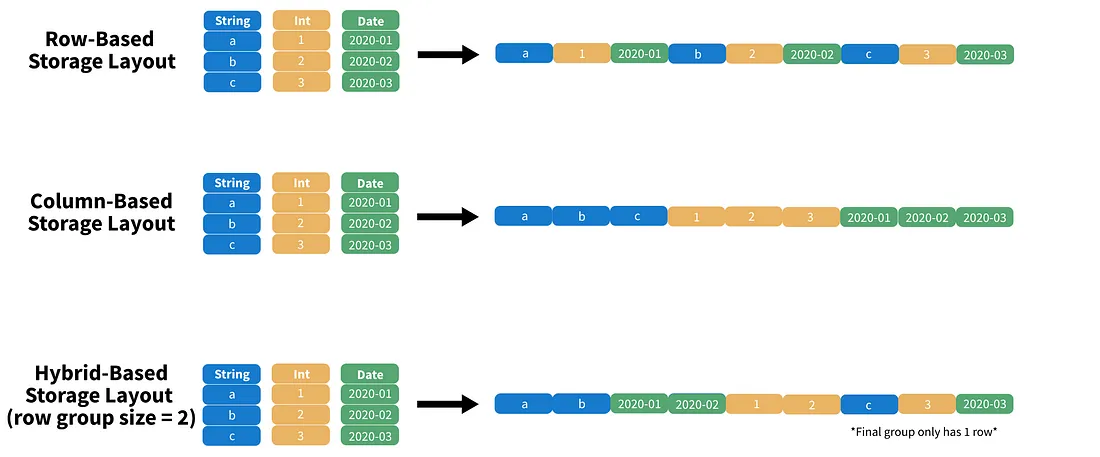

In [ ]:
#How to read parquet file
df = spark.read.parquet("/content/part-r-00000-1a9822ba-b8fb-4d8e-844a-ea30d0801b9e.gz.parquet")
df.show()

#How to write data in spark

In [ ]:
"""
1)what are the modes availble in dataframe writer
2)How to write data and How to write data into multiple partition?
3)what is partition by and buckeby
"""

In [ ]:
#How to write dataframe
"""
Dataframe writer API general stracture
---------------------------------------
DataFramewritter.format()\
                .option()\
                .partitionby()\
                .bucketby()\
                .save()

In [ ]:
#what are the modes in dataframe writer
"""
1)what are the modes availble in dataframe writer
Modes in dataframe writer API
------------------------------
1)append
2)Overwrite
3)errorifexists
4)ignore
"""

In [ ]:
employees1 = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .option("mode", "FAILFAST") \
    .load("/content/employees1.csv")
employees1.show()

+---+--------+---+------+-------+------+
| id|    name|age|salary|address|gender|
+---+--------+---+------+-------+------+
|  1|  Manish| 26| 75000|  INDIA|     m|
|  2|  Nikita| 23|100000|    USA|     f|
|  3|  Pritam| 22|150000|  INDIA|     m|
|  4|Prantosh| 17|200000|  JAPAN|     m|
|  5|  Vikash| 31|300000|    USA|     m|
|  6|   Rahul| 55|300000|  INDIA|     m|
|  7|    Raju| 67|540000|    USA|     m|
|  8| Praveen| 28| 70000|  JAPAN|     m|
|  9|     Dev| 32|150000|  JAPAN|     m|
| 10|  Sherin| 16| 25000| RUSSIA|     f|
| 11|    Ragu| 12| 35000|  INDIA|     f|
| 12|   Sweta| 43|200000|  INDIA|     f|
| 13| Raushan| 48|650000|    USA|     m|
| 14|  Mukesh| 36| 95000| RUSSIA|     m|
| 15| Prakash| 52|750000|  INDIA|     m|
+---+--------+---+------+-------+------+



In [ ]:
##How to keep data(employee1=jo bhi change karna hai kar liye hai) in other single file(single partition)
"""
Normal stracture
------------------
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","------")\
        .save() """

employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition/")\
        .save()

In [ ]:
#How to keep data(employee1=jo bhi change karna hai kar liye hai) in other multiple file(multiple partition)
employees1.repartition(3).write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition1/")\
        .save()

#Partitioning and bucketing in Spark  -6

In [ ]:
"""
1)what is partitining in spark
2)What is bucketing in spark
3)why do we use partitioning
4)when to use partitioning
5)when to use bucketing
OLAP
----
write once
read many """

In [ ]:
#1)what is partitining in spark
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition_By_address/")\
        .partitionBy("address")\
        .save()

In [ ]:
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition_By_id/")\
        .partitionBy("id")\
        .save()

In [ ]:
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition_By_address_gender/")\
        .partitionBy("address","gender")\
        .save()

In [ ]:
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition_By_gender_address/")\
        .partitionBy("gender","address")\
        .save()

In [ ]:
import shutil
# Specify the path to the directory you want to remove
folder_path = '/content/sample_data/partition_By_address1'

# Remove the directory and all its contents
shutil.rmtree(folder_path)

print(f"{folder_path} and all its contents have been removed.")


/content/sample_data/partition_By_address1 and all its contents have been removed.


In [ ]:
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/partition_By_address/")\
        .partitionBy("address")\
        .save()

In [ ]:
#What is bucketing
employees1.write.format("csv")\
        .option("header","true")\
        .option("mode","overwrite")\
        .option("path","/content/sample_data/bucketing_By_id/")\
        .bucketBy(3,"id")\
        .saveAsTable("bucket_by_id_table")

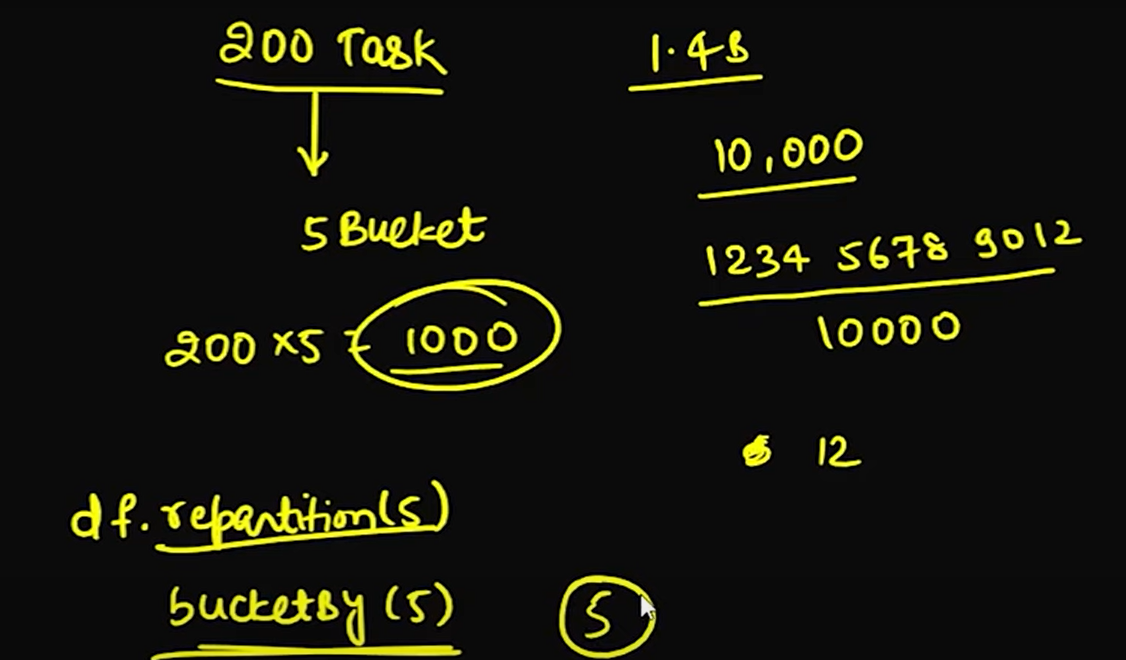

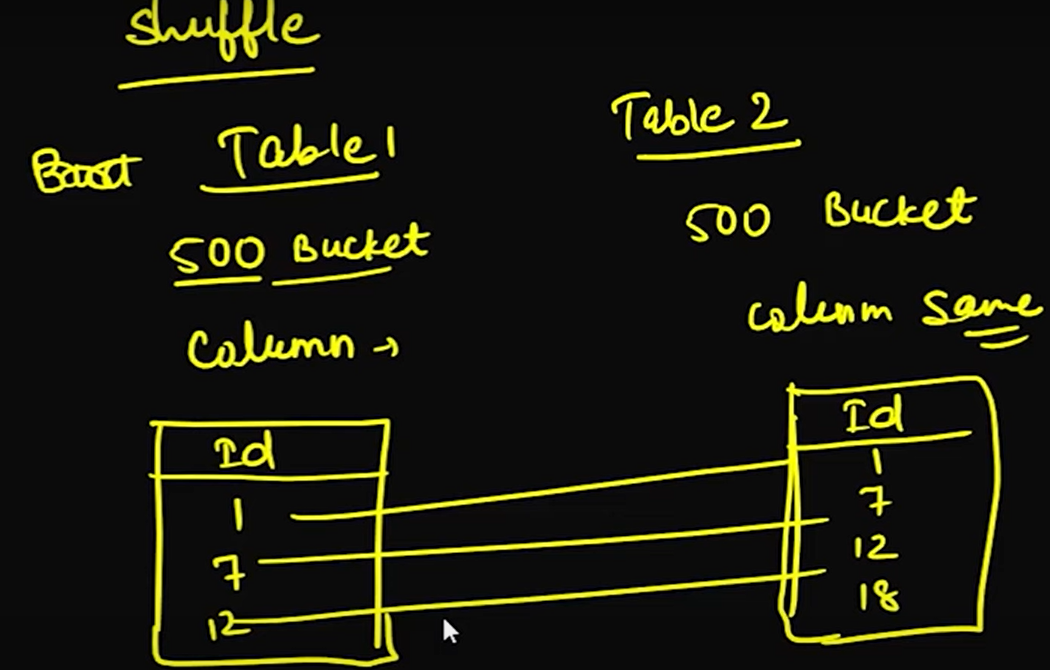

#create dataframe in spark

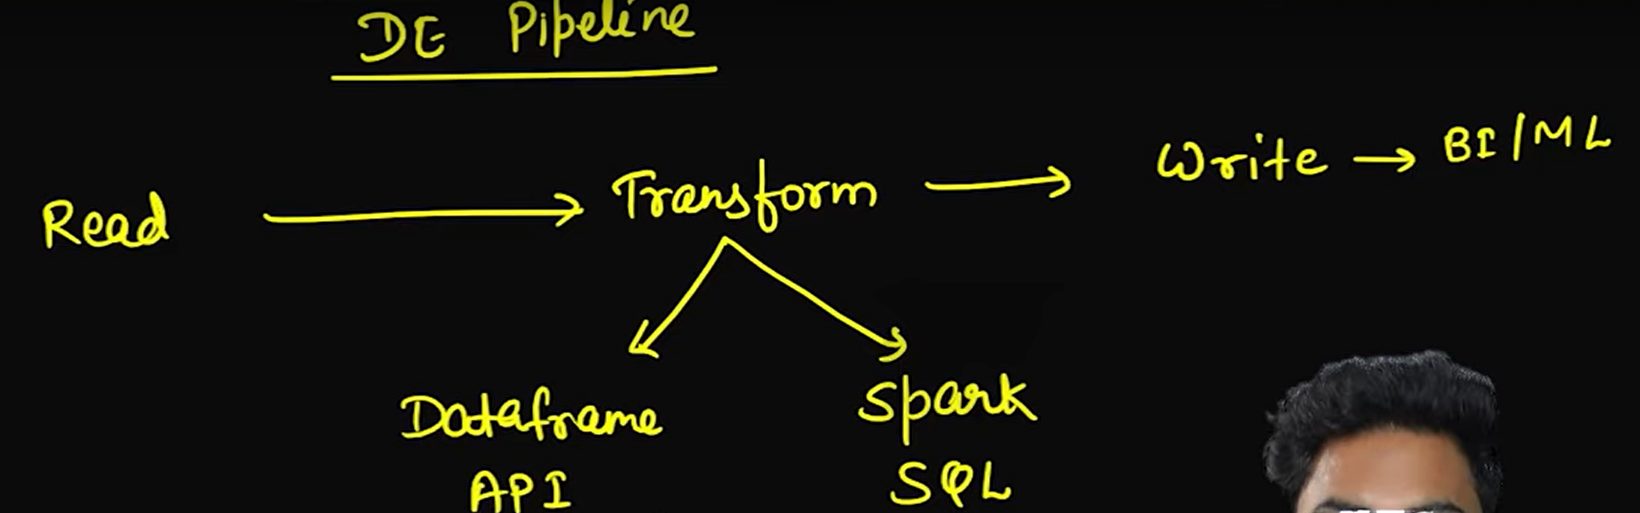

In [ ]:
My_data = [(1,  1),
(2,  1),
(3,  1),
(4,  2),
(5,  1),
(6,  2),
(7,  2)]

In [ ]:
My_schema=['id', 'num']

In [ ]:
df=spark.createDataFrame(data=My_data,schema=My_schema)
df.show()

##dataframe transformations in spark

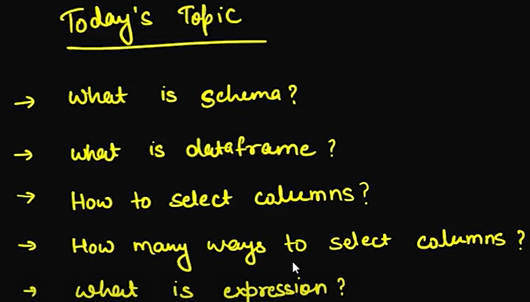

In [ ]:
#1)what is schema

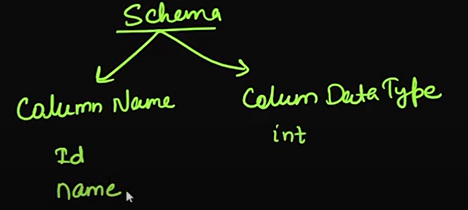

In [ ]:
#2)How to see schema
employees1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- gender: string (nullable = true)



In [ ]:
#2)How to see columns
employees1.columns

['id', 'name', 'age', 'salary', 'address', 'gender']

In [ ]:
#3)How to create Manual schema
my_schema=StructType(
                      [
                        StructField("id",IntergerType(),True)
                        StructField("name",StringType(),True)
                        StructField("age",IntegerType(),True)
                        StructField("salary",IntegerType(),True)
                        StructField("address",StringType(),True)
                        StructField("nominee",StringType(),True)
                        StructField("_corrupt_record",StringType(),True)
                      ]
                     )

In [ ]:
employees1.select("name").show()

In [5]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
employees1.select(col("name")).show()

In [ ]:
#Why we write in col
employees1.select("id+5").show()  #it will give error

In [ ]:
employees1.select(col("id")+5).show()

In [ ]:
#select multiple column
employees1.select("id","name","age").show()

In [ ]:
#select with help of multiple methods
employees1.select("id",col("name"),employees1["salary"],employees1.address).show()

In [ ]:
#what is expression
employees1.select(expr("id+5")).show()

In [ ]:
#how to do aliasing
employees1.select(expr("id as id_number"),expr("name as employees_name"),expr("concat(name,address)")).show()

In [ ]:
#How to select all column in spark
employees1.select("*").show()

In [ ]:
#If employees1 is a DataFrame, you need to register it as a temporary view before querying.
employees1.createOrReplaceTempView("employees1")

In [ ]:
#How to write in spark sql
spark.sql("SELECT * FROM employees1").show()

+---+--------+---+------+-------+------+
| id|    name|age|salary|address|gender|
+---+--------+---+------+-------+------+
|  1|  Manish| 26| 75000|  INDIA|     m|
|  2|  Nikita| 23|100000|    USA|     f|
|  3|  Pritam| 22|150000|  INDIA|     m|
|  4|Prantosh| 17|200000|  JAPAN|     m|
|  5|  Vikash| 31|300000|    USA|     m|
|  6|   Rahul| 55|300000|  INDIA|     m|
|  7|    Raju| 67|540000|    USA|     m|
|  8| Praveen| 28| 70000|  JAPAN|     m|
|  9|     Dev| 32|150000|  JAPAN|     m|
| 10|  Sherin| 16| 25000| RUSSIA|     f|
| 11|    Ragu| 12| 35000|  INDIA|     f|
| 12|   Sweta| 43|200000|  INDIA|     f|
| 13| Raushan| 48|650000|    USA|     m|
| 14|  Mukesh| 36| 95000| RUSSIA|     m|
| 15| Prakash| 52|750000|  INDIA|     m|
+---+--------+---+------+-------+------+



In [ ]:
#How to give alias
employees1.select(col("id").alias("employees_id"),"name","age").show()

In [ ]:
#How to do filtering
employees1.filter(col("salary")>150000).show()

+---+--------+---+------+-------+------+
| id|    name|age|salary|address|gender|
+---+--------+---+------+-------+------+
|  4|Prantosh| 17|200000|  JAPAN|     m|
|  5|  Vikash| 31|300000|    USA|     m|
|  6|   Rahul| 55|300000|  INDIA|     m|
|  7|    Raju| 67|540000|    USA|     m|
| 12|   Sweta| 43|200000|  INDIA|     f|
| 13| Raushan| 48|650000|    USA|     m|
| 15| Prakash| 52|750000|  INDIA|     m|
+---+--------+---+------+-------+------+



In [ ]:

employees1.where(col("salary")>150000).show()

In [ ]:
employees1.filter((col("salary")>150000) & (col("age")>18)).show()

+---+-------+---+------+-------+------+
| id|   name|age|salary|address|gender|
+---+-------+---+------+-------+------+
|  5| Vikash| 31|300000|    USA|     m|
|  6|  Rahul| 55|300000|  INDIA|     m|
|  7|   Raju| 67|540000|    USA|     m|
| 12|  Sweta| 43|200000|  INDIA|     f|
| 13|Raushan| 48|650000|    USA|     m|
| 15|Prakash| 52|750000|  INDIA|     m|
+---+-------+---+------+-------+------+



In [ ]:
#how to do literal
employees1.select("*",lit("kumar").alias("middle")).show()

+---+--------+---+------+-------+------+------+
| id|    name|age|salary|address|gender|middle|
+---+--------+---+------+-------+------+------+
|  1|  Manish| 26| 75000|  INDIA|     m| kumar|
|  2|  Nikita| 23|100000|    USA|     f| kumar|
|  3|  Pritam| 22|150000|  INDIA|     m| kumar|
|  4|Prantosh| 17|200000|  JAPAN|     m| kumar|
|  5|  Vikash| 31|300000|    USA|     m| kumar|
|  6|   Rahul| 55|300000|  INDIA|     m| kumar|
|  7|    Raju| 67|540000|    USA|     m| kumar|
|  8| Praveen| 28| 70000|  JAPAN|     m| kumar|
|  9|     Dev| 32|150000|  JAPAN|     m| kumar|
| 10|  Sherin| 16| 25000| RUSSIA|     f| kumar|
| 11|    Ragu| 12| 35000|  INDIA|     f| kumar|
| 12|   Sweta| 43|200000|  INDIA|     f| kumar|
| 13| Raushan| 48|650000|    USA|     m| kumar|
| 14|  Mukesh| 36| 95000| RUSSIA|     m| kumar|
| 15| Prakash| 52|750000|  INDIA|     m| kumar|
+---+--------+---+------+-------+------+------+



In [ ]:
#How to do add new column
employees1.withColumn("last",lit("singh")).show()

In [ ]:
#How to do renaming columns
employees11=employees1.withColumnRenamed("id","employee_id").show()

+-----------+--------+---+------+-------+------+
|employee_id|    name|age|salary|address|gender|
+-----------+--------+---+------+-------+------+
|          1|  Manish| 26| 75000|  INDIA|     m|
|          2|  Nikita| 23|100000|    USA|     f|
|          3|  Pritam| 22|150000|  INDIA|     m|
|          4|Prantosh| 17|200000|  JAPAN|     m|
|          5|  Vikash| 31|300000|    USA|     m|
|          6|   Rahul| 55|300000|  INDIA|     m|
|          7|    Raju| 67|540000|    USA|     m|
|          8| Praveen| 28| 70000|  JAPAN|     m|
|          9|     Dev| 32|150000|  JAPAN|     m|
|         10|  Sherin| 16| 25000| RUSSIA|     f|
|         11|    Ragu| 12| 35000|  INDIA|     f|
|         12|   Sweta| 43|200000|  INDIA|     f|
|         13| Raushan| 48|650000|    USA|     m|
|         14|  Mukesh| 36| 95000| RUSSIA|     m|
|         15| Prakash| 52|750000|  INDIA|     m|
+-----------+--------+---+------+-------+------+



In [ ]:
#how to do casting data types
employees1.withColumn("id",col("id").cast("string")).printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- gender: string (nullable = true)



In [ ]:
employees1.withColumn("id",col("id").cast("string"))\
          .withColumn("salary",col("salary").cast("long"))\
.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: long (nullable = true)
 |-- address: string (nullable = true)
 |-- gender: string (nullable = true)



In [ ]:
#Removing columns form table
employees1.drop("id",col("id")).show()

+--------+---+------+-------+------+
|    name|age|salary|address|gender|
+--------+---+------+-------+------+
|  Manish| 26| 75000|  INDIA|     m|
|  Nikita| 23|100000|    USA|     f|
|  Pritam| 22|150000|  INDIA|     m|
|Prantosh| 17|200000|  JAPAN|     m|
|  Vikash| 31|300000|    USA|     m|
|   Rahul| 55|300000|  INDIA|     m|
|    Raju| 67|540000|    USA|     m|
| Praveen| 28| 70000|  JAPAN|     m|
|     Dev| 32|150000|  JAPAN|     m|
|  Sherin| 16| 25000| RUSSIA|     f|
|    Ragu| 12| 35000|  INDIA|     f|
|   Sweta| 43|200000|  INDIA|     f|
| Raushan| 48|650000|    USA|     m|
|  Mukesh| 36| 95000| RUSSIA|     m|
| Prakash| 52|750000|  INDIA|     m|
+--------+---+------+-------+------+



#All about Union and union all

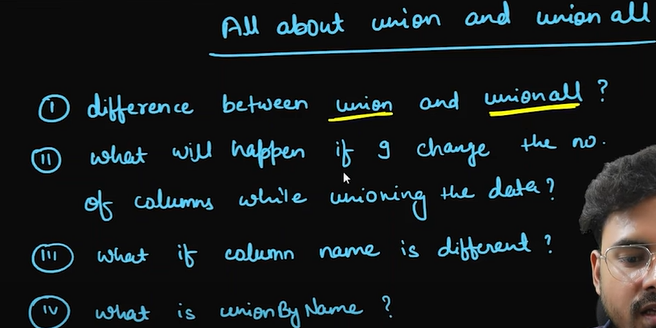

In [ ]:
# Define sample data for the first DataFrame
data1 = [
    Row(id=1, name="Alice", age=30),
    Row(id=2, name="Bob", age=25),
    Row(id=1, name="Alice",age=30)
]

# Define sample data for the second DataFrame
data2 = [
    Row(id=3, name="Charlie", age=35),
    Row(id=4, name="David", age=40)
]

# Create DataFrames from the data
df1 = spark.createDataFrame(data1)
df2 = spark.createDataFrame(data2)

# Show DataFrames
df1.show()
df2.show()

+---+-----+---+
| id| name|age|
+---+-----+---+
|  1|Alice| 30|
|  2|  Bob| 25|
|  1|Alice| 30|
+---+-----+---+

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  3|Charlie| 35|
|  4|  David| 40|
+---+-------+---+



In [ ]:
df1.union(df2).show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  1|  Alice| 30|
|  2|    Bob| 25|
|  3|charlie| 35|
|  3|Charlie| 35|
|  4|  David| 40|
+---+-------+---+



In [ ]:
df1.unionAll(df2).show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  1|  Alice| 30|
|  2|    Bob| 25|
|  3|charlie| 35|
|  3|Charlie| 35|
|  4|  David| 40|
+---+-------+---+



In [ ]:
#If we are working in spark dataframe then union and unionAll are works same.

In [ ]:
df1.createOrReplaceTempView("df1_1")
df2.createOrReplaceTempView("df2_1")

In [ ]:
# UNION
spark.sql("""
SELECT * FROM df1_1
UNION
SELECT * FROM df2_1
""").count()

4

In [ ]:
#UNION ALL
spark.sql("""
SELECT * FROM df1_1
UNION ALL
SELECT * FROM df2_1
""").count()

5

In [ ]:
# Define sample data for the first DataFrame
data1 = [(1,'Alice',30),
         (2,'Bob',25),
         (3,'Charlie',35)]

my_schema1 =['id','name','age']

# Define sample data for the second DataFrame
data2 = [(3,'Charlie'),
         (4,'david')]

my_schema2 =['id','name']

# Create DataFrames from the data
df3 = spark.createDataFrame(data=data1,schema=my_schema1)
df4 = spark.createDataFrame(data=data2,schema=my_schema2)

# Show DataFrames
df3.show()
df4.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  1|  Alice| 30|
|  2|    Bob| 25|
|  3|Charlie| 35|
+---+-------+---+

+---+-------+
| id|   name|
+---+-------+
|  3|Charlie|
|  4|  david|
+---+-------+



In [ ]:
df3.createOrReplaceTempView("df3_1")
df4.createOrReplaceTempView("df4_1")

In [ ]:
#If we will give join it will give error because it has not fix number of column
df3.union(df4)

In [ ]:
df3.select('id','name').union(df4).show()

+---+-------+
| id|   name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  3|Charlie|
|  3|Charlie|
|  4|  david|
+---+-------+



In [ ]:
# Define sample data for the first DataFrame
data1 = [(30,'Alice',1),
         (25,'Bob',2),
         (35,'Charlie',3)]

my_schema1 =['age','name','id']

# Define sample data for the second DataFrame
data2 = [(3,'Charlie','35'),
         (4,'david','40')]

my_schema2 =['id','name','age']

# Create DataFrames from the data
df5 = spark.createDataFrame(data=data1,schema=my_schema1)
df6 = spark.createDataFrame(data=data2,schema=my_schema2)

# Show DataFrames
df5.show()
df6.show()

+---+-------+---+
|age|   name| id|
+---+-------+---+
| 30|  Alice|  1|
| 25|    Bob|  2|
| 35|Charlie|  3|
+---+-------+---+

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  3|Charlie| 35|
|  4|  david| 40|
+---+-------+---+



In [ ]:
#If we will give join it will return wrong data
df5.union(df6).show()

+---+-------+---+
|age|   name| id|
+---+-------+---+
| 30|  Alice|  1|
| 25|    Bob|  2|
| 35|Charlie|  3|
|  3|Charlie| 35|
|  4|  david| 40|
+---+-------+---+



In [ ]:
#UnionByName
df5.unionByName(df6).show()

+---+-------+---+
|age|   name| id|
+---+-------+---+
| 30|  Alice|  1|
| 25|    Bob|  2|
| 35|Charlie|  3|
| 35|Charlie|  3|
| 40|  david|  4|
+---+-------+---+



#If Else

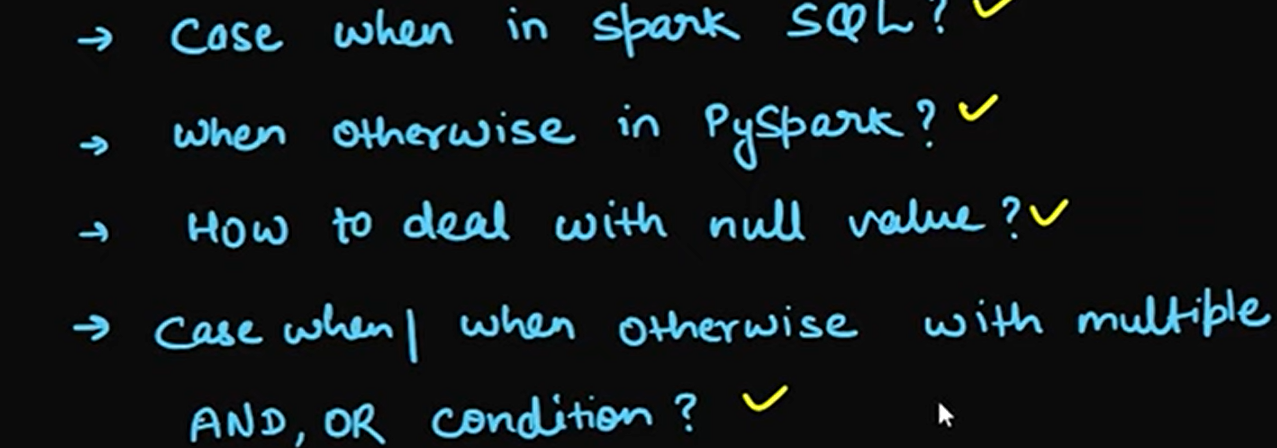

In [ ]:
emp_data = [
(1,'manish',26,20000,'india','IT'),
(2,'rahul',None,40000,'germany','engineering'),
(3,'pawan',12,60000,'india','sales'),
(4,'roshini',44,None,'uk','engineering'),
(5,'raushan',35,70000,'india','sales'),
(6,None,29,200000,'uk','IT'),
(7,'adam',37,65000,'us','IT'),
(8,'chris',16,40000,'us','sales'),
(None,None,None,None,None,None),
(7,'adam',37,65000,'us','IT')
]
emp_schema=['id','Name','age','salary','country','department']
df7 = spark.createDataFrame(data=emp_data,schema=emp_schema)

In [ ]:
df7.createOrReplaceTempView("df7")

In [ ]:
df7.show()

In [ ]:
df7.withColumn("adult",when(col("age")<18,"No")
                       .when(col("age")>18,"yes")
                       .otherwise("Novalue")).show()

In [ ]:
df7.withColumn("age",when(col("age").isNull(),lit(19))
        .otherwise(col("age")))\
        .withColumn("adult",when(col("age")>18,"yes")
        .otherwise("No")).show()

In [ ]:
#Spark SQL
spark.sql("""select *,
         case when age<18 then 'minor'
              when age>18 then 'major'
              else 'novalue'
              end as adult
              from df7""").show()

#Unique & sorted records

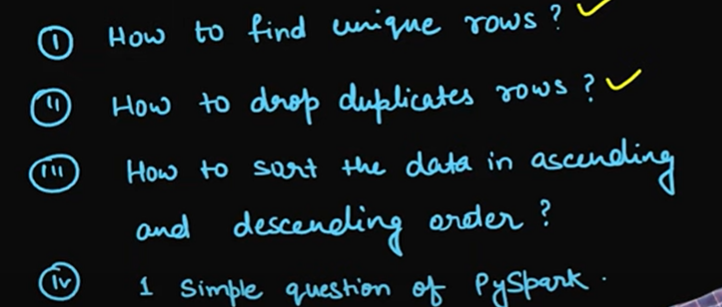

In [ ]:
data1=[(10 ,'Anil',50000, 18),
(11 ,'Vikas',75000,  16),
(12 ,'Nisha',40000,  18),
(13 ,'Nidhi',60000,  17),
(14 ,'Priya',80000,  18),
(15 ,'Mohit',45000,  18),
(16 ,'Rajesh',90000, 10),
(17 ,'Raman',55000, 16),
(18 ,'Sam',65000,   17),
(15 ,'Mohit',45000,  18),
(13 ,'Nidhi',60000,  17),
(14 ,'Priya',90000,  18),
(18 ,'Sam',65000,   17)
     ]

schema1=['id','name','sal','mngr_id']
mngr=spark.createDataFrame(data=data1,schema=schema1)
mngr.show()

In [ ]:
from pyspark.sql.functions import sum, max, min, avg

In [ ]:
#How to find distinct(unique) values
mngr.distinct().count()

10

In [ ]:
mngr.count()

13

In [ ]:
mngr.select('id','name').distinct().show()

In [ ]:
#How to drop duplicates values
mngr.drop_duplicates().count()

10

In [ ]:
mngr.drop_duplicates().show()

In [ ]:
#How to sort the data default asc
mngr.sort(col("sal")).show()

In [ ]:
#How to sort the data in asc
mngr.sort(col("sal").asc()).show()

In [ ]:
#How to sort the data in desc
mngr.sort(col("sal").desc()).show()

In [ ]:
#Multiple column sorting
mngr.sort(col("sal").asc(),col("name").desc()).show()

In [ ]:
#count as transformation
mngr.select(count("name")).show()

In [ ]:
#count as action
mngr.count()

13

In [ ]:
#Sum.min,max,avg,count
mngr.select(sum("sal"), max("sal"), min("sal"), avg("sal"), count("*")).show()

In [ ]:
mngr.show()

#Groupby

In [ ]:
data2=[(1,'manish',50000,'IT'),
(2,'vikash',60000,'sales'),
(3,'raushan',70000,'marketing'),
(4,'mukesh',80000,'IT'),
(5,'pritam',90000,'sales'),
(6,'nikita',45000,'marketing'),
(7,'ragini',55000,'marketing'),
(8,'rakesh',100000,'IT'),
(9,'aditya',65000,'IT'),
(10,'rahul',50000,'marketing')]
schema2=['id','name','sal','dept']
emp=spark.createDataFrame(data=data2,schema=schema2)
emp.createOrReplaceTempView("emp")
emp.show()

In [ ]:
#GroupBy Perform
emp.groupby("dept").agg(sum("sal")).show()

In [ ]:
emp.groupby("dept").agg(sum("sal"),min("sal")).show()

In [ ]:
spark.sql("""select dept,sum(sal)
             from emp
             group by "dept"
             """)

#Joins

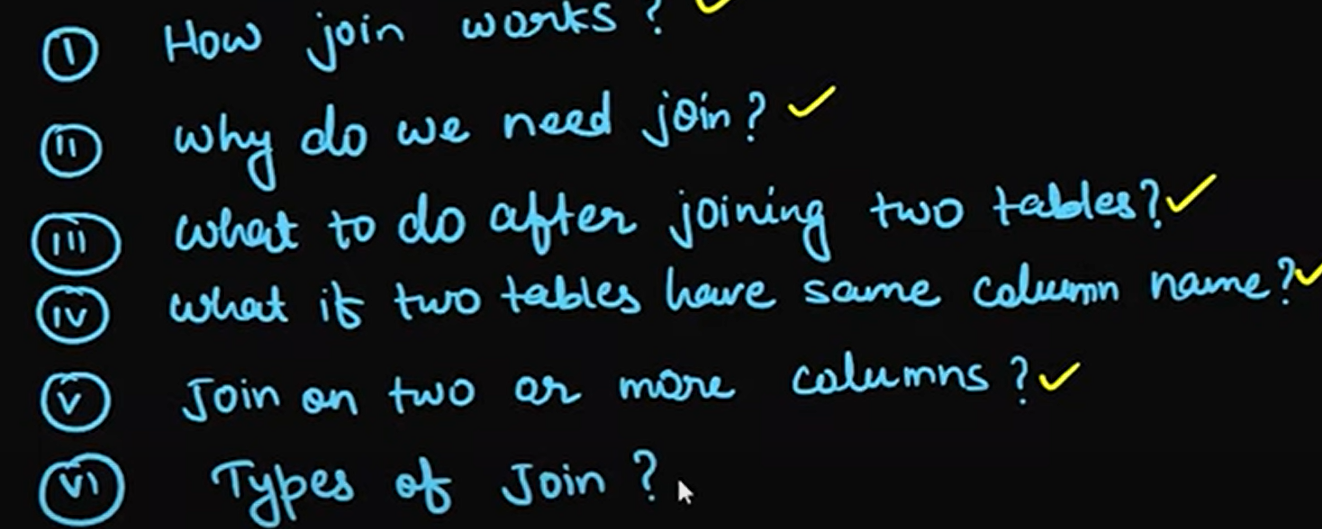

In [ ]:
customer_data = [(1,'manish','patna',"30-05-2022"),
(2,'vikash','kolkata',"12-03-2023"),
(3,'nikita','delhi',"25-06-2023"),
(4,'rahul','ranchi',"24-03-2023"),
(5,'mahesh','jaipur',"22-03-2023"),
(6,'prantosh','kolkata',"18-10-2022"),
(7,'raman','patna',"30-12-2022"),
(8,'prakash','ranchi',"24-02-2023"),
(9,'ragini','kolkata',"03-03-2023"),
(10,'raushan','jaipur',"05-02-2023")]

customer_schema=['customer_id','customer_name','address','date_of_joining']

sales_data = [(1,22,10,"01-06-2022"),
(1,27,5,"03-02-2023"),
(2,5,3,"01-06-2023"),
(5,22,1,"22-03-2023"),
(7,22,4,"03-02-2023"),
(9,5,6,"03-03-2023"),
(2,1,12,"15-06-2023"),
(1,56,2,"25-06-2023"),
(5,12,5,"15-04-2023"),
(11,12,76,"12-03-2023")]

sales_schema=['customer_id','product_id','quantity','date_of_purchase']

product_data = [(1, 'fanta',20),
(2, 'dew',22),
(5, 'sprite',40),
(7, 'redbull',100),
(12,'mazza',45),
(22,'coke',27),
(25,'limca',21),
(27,'pepsi',14),
(56,'sting',10)]

product_schema=['id','name','price']

customer=spark.createDataFrame(data=customer_data,schema=customer_schema)
sales=spark.createDataFrame(data=sales_data,schema=sales_schema)
product=spark.createDataFrame(data=product_data,schema=product_schema)
customer.show()
sales.show()
product.show()

In [ ]:
#Join formula
df1.join(df2,join expression,jointype)

In [ ]:
#joins
customer.join(sales,sales["customer_id"]==customer["customer_id"],"inner").show()

In [ ]:
customer.join(sales,sales["customer_id"]==customer["customer_id"],"inner")\
        .select(sales["product_id"]).sort("product_id").show()

In [ ]:
#joins in multiple columns
customer.join(sales,(sales["customer_id"]==customer["customer_id"]) &
                    (sales["product_id"]==customer["customer_id"]),"inner")\
        .select(sales["product_id"]).sort("product_id").show()

In [ ]:
#Left semi join
left semi join will show only left table matching, it will not show from right table also matching columns.

In [ ]:
#Right semi join
Right semi join will show only left table matching, it will not show from left table also matching columns.

#Window function

#Key Components of Window Functions
####1)Partitioning (partitionBy): Divides the data into groups (partitions) for which the window function will be applied independently.


####2)Ordering (orderBy): Specifies the order of rows within each partition. This is especially important for functions like rank, row_number, and lead/lag.


####3)Window Specification: Defines the window frame over which the function operates. This can be a specific range of rows around the current row.

#Common Window Functions
--------------------------
1)Ranking Functions: row_number(), rank(), dense_rank()

2)Aggregate Functions: sum(), avg(), min(), max()

3)Lag/Lead Functions: lag(), lead()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Create a Spark session
spark = SparkSession.builder.appName("WindowFunctionExample").getOrCreate()

# Sample data
data = [("HR", 4000, "John"),
        ("HR", 4500, "Doe"),
        ("HR", 3900, "Jane"),
        ("IT", 5000, "Smith"),
        ("IT", 4800, "James"),
        ("IT", 5100, "Alice")]

columns = ["department", "salary", "employee_name"]
df = spark.createDataFrame(data, columns)

# Define the window specification
windowSpec = Window.partitionBy("department").orderBy("salary")

# Apply row_number() window function
df.withColumn("row_number", row_number().over(windowSpec)).show()

In [ ]:
from pyspark.sql.functions import lag

# Define the window specification
windowSpec = Window.partitionBy("department").orderBy("salary")

# Apply lag() window function
df.withColumn("previous_salary", lag("salary", 1).over(windowSpec)).show()

In [ ]:
from pyspark.sql.functions import avg

# Apply avg() window function
df.withColumn("avg_salary", avg("salary").over(windowSpec)).show()